<a href="https://colab.research.google.com/github/priyanshu0627/BOOK_GENRE_CLASSIFICATION/blob/main/BOOK_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-type" content="text/html; charset=utf-8">
<meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
<title>Page not found &middot; GitHub Pages</title>
<style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: table-cell
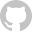
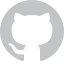

In [ ]:
!curl -s https://course.fast.ai/setup/colab

In [ ]:
from fastai.vision import *

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from  google.colab import drive


In [ ]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
t_path='/content/gdrive/My Drive/Colab Notebooks/Books'
p_path=Path(t_path)
for folder in ('Children-Books', 'Religion', 'Romance', 'Science-Fiction-Fantasy-Horror','Sport'):
    print(folder)
    verify_images(p_path/folder, delete=True, max_size=600)

Children-Books


Religion


Romance


Science-Fiction-Fantasy-Horror


Sport


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (3944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Romance,Romance,Romance,Romance,Romance
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Valid: LabelList (985 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Children-Books,Religion,Romance,Children-Books,Religion
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Test: None

In [ ]:
data.classes

['Children-Books',
 'Religion',
 'Romance',
 'Science-Fiction-Fantasy-Horror',
 'Sport']

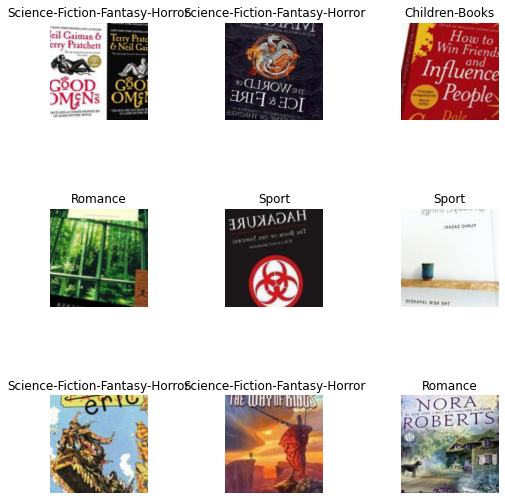

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3944,
 985)

In [ ]:
from fastai.metrics import accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (3944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Romance,Romance,Romance,Romance,Romance
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Valid: LabelList (985 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Children-Books,Religion,Romance,Children-Books,Religion
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [ ]:
defaults.device = torch.device('cuda')
torch.cuda.is_available()

True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


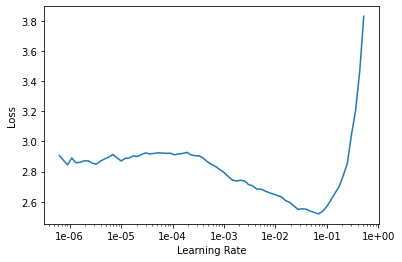

In [ ]:
learn.recorder.plot()


In [ ]:
lr = 0.0001

In [ ]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.909011,2.115325,0.213198,00:44
1,2.662550,1.782160,0.327919,00:44
2,2.379822,1.589445,0.401015,00:44
3,2.159255,1.512861,0.438579,00:43
4,2.021311,1.475401,0.451777,00:43
5,1.908213,1.455537,0.460914,00:43
6,1.878971,1.439773,0.470051,00:43
7,1.843991,1.434059,0.481218,00:44
8,1.810343,1.432362,0.482233,00:43
9,1.811914,1.432401,0.482233,00:43


In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


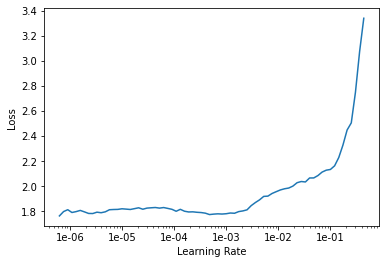

In [ ]:
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(10, slice(0.0001, lr/5))


epoch,train_loss,valid_loss,accuracy,time
0,1.794771,1.407129,0.490355,00:44
1,1.723266,1.397648,0.493401,00:44
2,1.620562,1.353238,0.522843,00:43
3,1.497781,1.319372,0.540102,00:42
4,1.372204,1.292116,0.530964,00:42
5,1.255554,1.271208,0.556345,00:41
6,1.159467,1.257229,0.573604,00:41
7,1.088335,1.257446,0.571574,00:41
8,1.026755,1.251320,0.573604,00:41
9,1.007756,1.249810,0.572589,00:41


In [ ]:
learn.save('res34-stage1')


In [ ]:
from fastai.widgets import *


In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)


In [ ]:
ImageCleaner(ds, idxs, p_path)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn)


Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, p_path, duplicates=True)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:

df = pd.read_csv(p_path/'cleaned.csv', header='infer')
df.head()

,name,label
0,Romance/0000014.jpg,Romance
1,Romance/0000012.jpg,Romance
2,Romance/0000011.jpg,Romance
3,Romance/0000019.jpg,Romance
4,Romance/0000010.jpg,Romance


In [ ]:
df[(df['name'].apply(lambda x: len(x)<5))]


,name,label


In [ ]:
np.random.seed(42)
db = (ImageList.from_df(df, p_path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [ ]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3944,
 985)

In [ ]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3156,
 788)

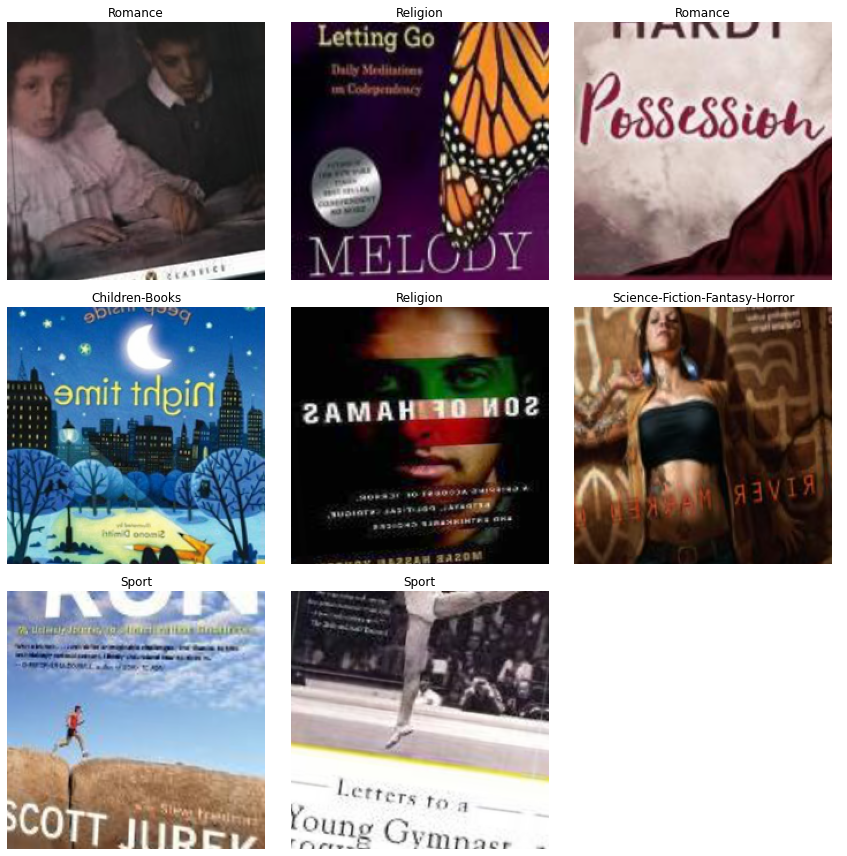

In [ ]:
db.show_batch()


In [ ]:
learn.data = db


In [ ]:
learn.freeze()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


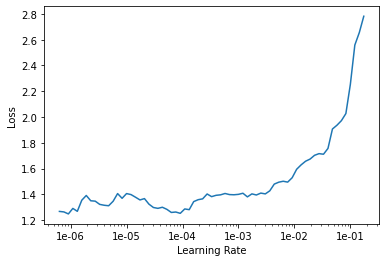

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=0.001

In [ ]:
learn.fit_one_cycle(8, slice(lr))


epoch,train_loss,valid_loss,accuracy,time
0,1.421451,0.622013,0.772843,00:39
1,1.559875,0.786051,0.709391,00:39
2,1.274873,0.806877,0.695431,00:39
3,1.230527,0.835999,0.709391,00:39
4,1.085589,0.745361,0.730964,00:39
5,1.049417,0.746057,0.728426,00:39
6,0.990503,0.717507,0.743655,00:38
7,0.913238,0.742609,0.730964,00:39


In [ ]:
learn.save('res34-stage2')


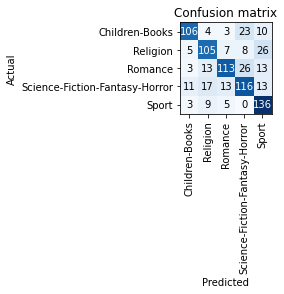

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('Religion', 'Sport', 26),
 ('Romance', 'Science-Fiction-Fantasy-Horror', 26),
 ('Children-Books', 'Science-Fiction-Fantasy-Horror', 23),
 ('Science-Fiction-Fantasy-Horror', 'Religion', 17),
 ('Romance', 'Religion', 13),
 ('Romance', 'Sport', 13),
 ('Science-Fiction-Fantasy-Horror', 'Romance', 13),
 ('Science-Fiction-Fantasy-Horror', 'Sport', 13),
 ('Science-Fiction-Fantasy-Horror', 'Children-Books', 11),
 ('Children-Books', 'Sport', 10),
 ('Sport', 'Religion', 9),
 ('Religion', 'Science-Fiction-Fantasy-Horror', 8),
 ('Religion', 'Romance', 7),
 ('Religion', 'Children-Books', 5),
 ('Sport', 'Romance', 5),
 ('Children-Books', 'Religion', 4),
 ('Children-Books', 'Romance', 3),
 ('Romance', 'Children-Books', 3),
 ('Sport', 'Children-Books', 3)]

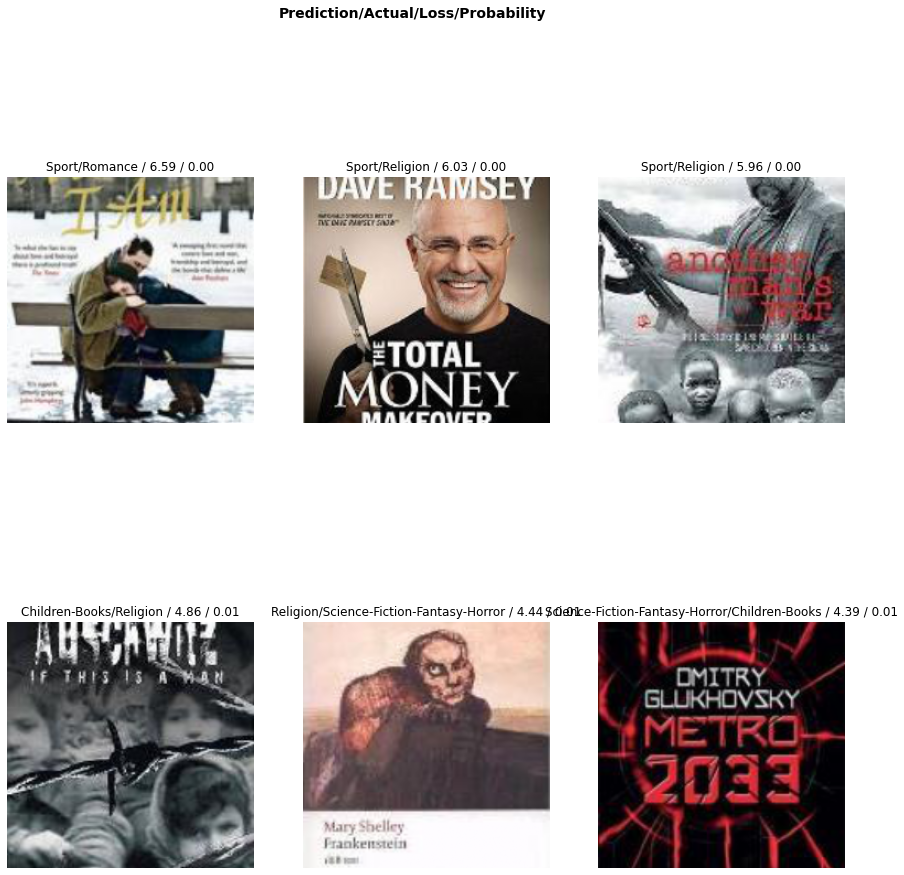

In [ ]:
interp.plot_top_losses(6, figsize=(15,15))


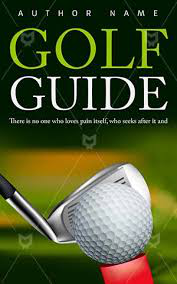

In [ ]:
img = open_image('/content/gdrive/My Drive/Colab Notebooks/PREDICTION/first_test.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Sport'

In [ ]:
learn.export()